# Signals

## Definition of Signals

A **signal** is a function that carries information about a physical phenomenon. In the context of signals and systems, we typically deal with signals that vary with time.

Mathematically, a signal can be represented as:

$$x(t) \quad \text{for continuous-time signals}$$

$$x[n] \quad \text{for discrete-time signals}$$

where:
- $t$ is a continuous variable (time)
- $n$ is a discrete variable (sample number)

## Classification of Signals

### Continuous-time vs Discrete-time

**Continuous-time signals** are defined for all values of time $t$ in a continuous interval.

**Discrete-time signals** are defined only at discrete time instants, typically at regular intervals.

### Analog vs Digital

- **Analog signals**: Continuous in both time and amplitude
- **Digital signals**: Discrete in both time and amplitude

### Periodic vs Aperiodic

A signal $x(t)$ is **periodic** if there exists a positive constant $T$ such that:

$$x(t) = x(t + T) \quad \text{for all } t$$

The smallest such $T$ is called the **fundamental period**.

### Even vs Odd

A signal is **even** if:
$$x(t) = x(-t)$$

A signal is **odd** if:
$$x(t) = -x(-t)$$

## Common Signals

### Unit Step Function

$$u(t) = \begin{cases}
1 & \text{if } t \geq 0 \\
0 & \text{if } t < 0
\end{cases}$$

### Unit Impulse Function (Dirac Delta)

$$\delta(t) = \begin{cases}
\infty & \text{if } t = 0 \\
0 & \text{if } t \neq 0
\end{cases}$$

with the property:
$$\int_{-\infty}^{\infty} \delta(t) \, dt = 1$$

### Sinusoidal Signals

$$x(t) = A \cos(\omega t + \phi)$$

where:
- $A$ is the amplitude
- $\omega$ is the angular frequency (rad/s)
- $\phi$ is the phase (rad)

## Interactive Examples

Let's explore some of these signals using Python:

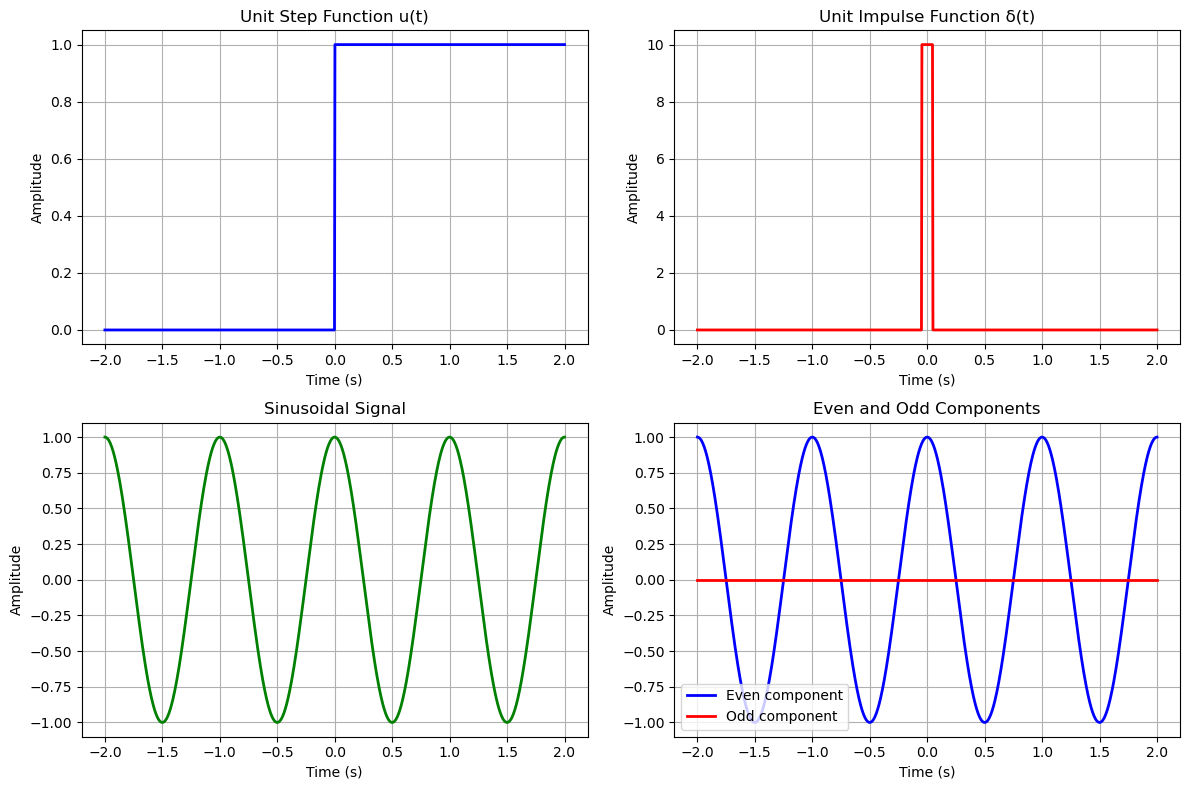

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Time vector
t = np.linspace(-2, 2, 1000)

# Unit step function
def unit_step(t):
    return np.where(t >= 0, 1, 0)

# Unit impulse approximation
def unit_impulse(t, width=0.1):
    return np.where(np.abs(t) <= width/2, 1/width, 0)

# Sinusoidal signal
def sinusoidal(t, A=1, omega=2*np.pi, phi=0):
    return A * np.cos(omega * t + phi)

# Plot the signals
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Unit step
axes[0,0].plot(t, unit_step(t), 'b-', linewidth=2)
axes[0,0].set_title('Unit Step Function u(t)')
axes[0,0].grid(True)
axes[0,0].set_xlabel('Time (s)')
axes[0,0].set_ylabel('Amplitude')

# Unit impulse
axes[0,1].plot(t, unit_impulse(t), 'r-', linewidth=2)
axes[0,1].set_title('Unit Impulse Function δ(t)')
axes[0,1].grid(True)
axes[0,1].set_xlabel('Time (s)')
axes[0,1].set_ylabel('Amplitude')

# Sinusoidal signal
axes[1,0].plot(t, sinusoidal(t), 'g-', linewidth=2)
axes[1,0].set_title('Sinusoidal Signal')
axes[1,0].grid(True)
axes[1,0].set_xlabel('Time (s)')
axes[1,0].set_ylabel('Amplitude')

# Even and odd components
x_even = 0.5 * (sinusoidal(t) + sinusoidal(-t))
x_odd = 0.5 * (sinusoidal(t) - sinusoidal(-t))

axes[1,1].plot(t, x_even, 'b-', label='Even component', linewidth=2)
axes[1,1].plot(t, x_odd, 'r-', label='Odd component', linewidth=2)
axes[1,1].set_title('Even and Odd Components')
axes[1,1].legend()
axes[1,1].grid(True)
axes[1,1].set_xlabel('Time (s)')
axes[1,1].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

RMS of signal x1: 1.001
RMS of signal x2: 1.000
Pk-Pk of signal x1: 4.703
Pk-Pk of signal x2: 3.640
Absolute difference in RMS: 0.001
Percentual difference in RMS: 0.11%
Absolute difference in Pk-Pk: 1.063
Percentual difference in Pk-Pk: 22.60%


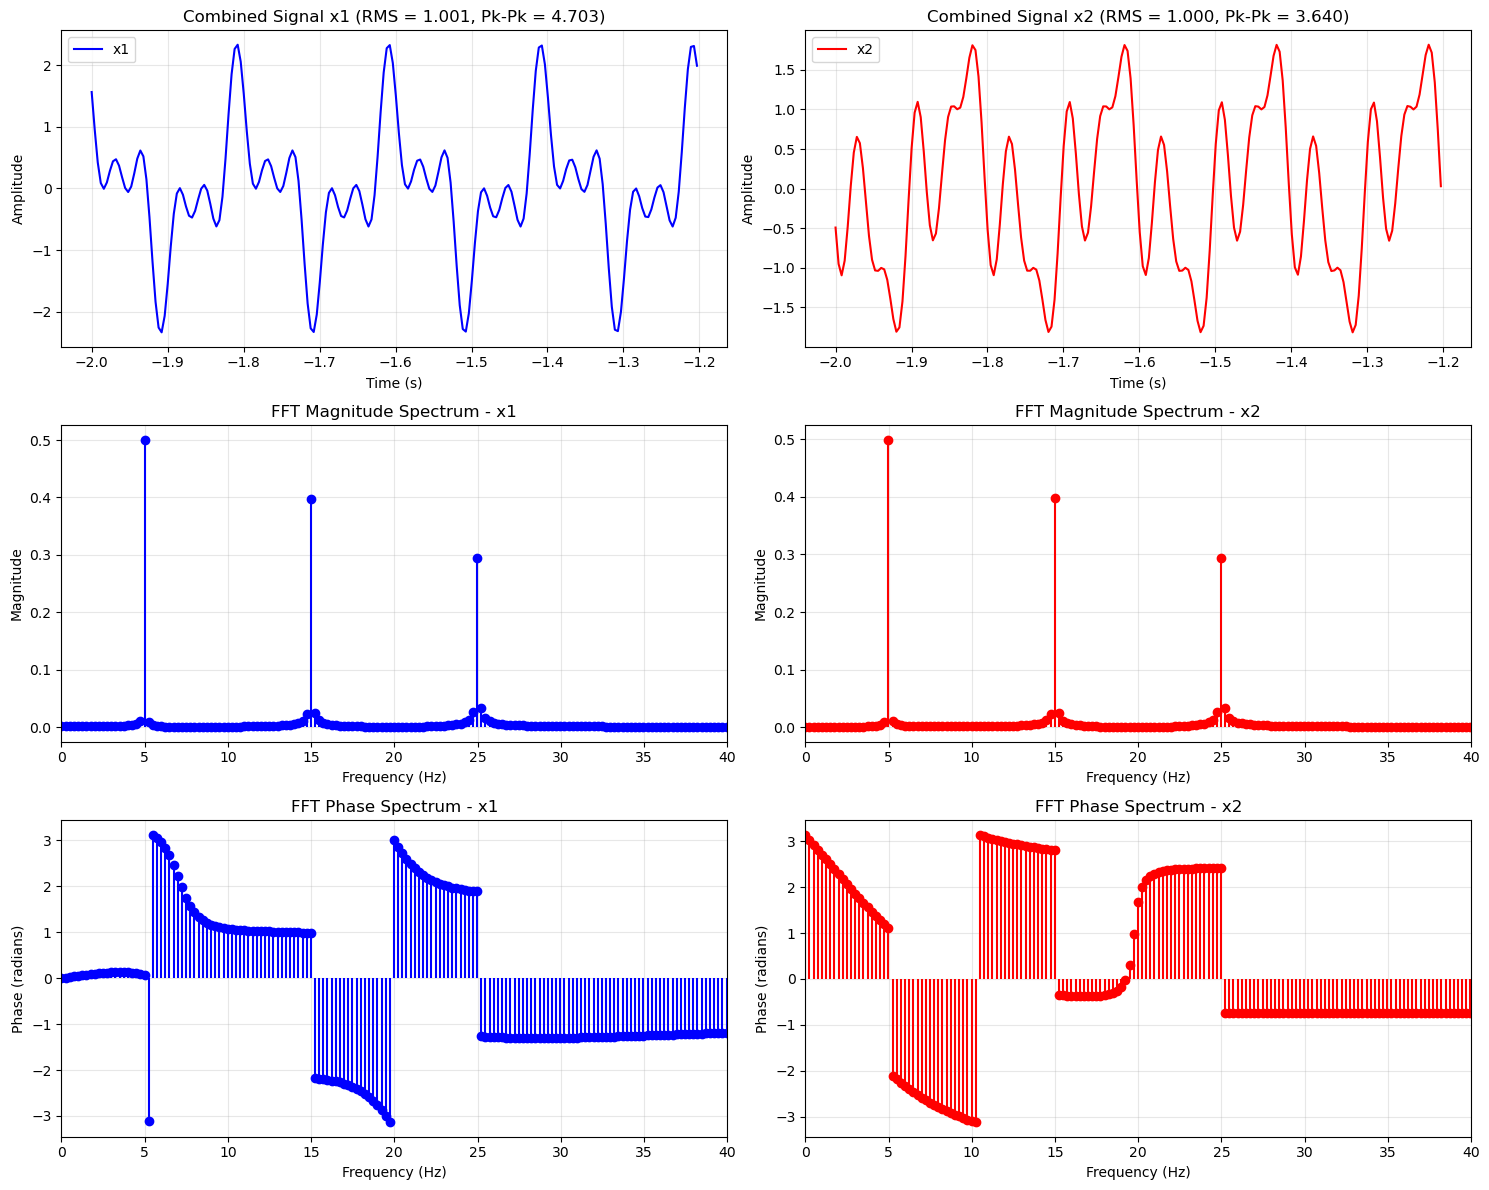


ANALYSIS:
Both signals x1 and x2 contain the same frequency components:
- 5 Hz (fundamental frequency)
- 15 Hz (third harmonic)
- 25 Hz (fifth harmonic)

The FFT magnitude spectra are nearly identical because:
- Both signals have the same frequency content
- Only the phases of individual components differ
- FFT magnitude is independent of phase information

However, the RMS and pk-pk values are different because:
- Different phase relationships cause constructive/destructive interference
- RMS depends on the instantaneous power, which varies with phase
- Pk-Pk (peak-to-peak) value also depends on phase relationships
- This demonstrates how phase affects signal energy distribution and amplitude range

Percentual difference in RMS: 0.11%
Percentual difference in Pk-Pk: 22.60%


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sinusoidal signal function
def sinusoidal(t, A=1, omega=2*np.pi, phi=0):
    return A * np.cos(omega * t + phi)

# RMS calculation function
def rms(x):
    return np.sqrt(np.mean(np.square(x)))

# Peak-to-peak calculation function
def pk2pk(x):
    return np.max(x) - np.min(x)

# Time vector
t = np.linspace(-2, 2, 1000)

# Create three base signals with different frequencies
s1 = sinusoidal(t, A=1, omega=2*np.pi*5, phi=0)      # 5 Hz
s2 = sinusoidal(t, A=0.8, omega=2*np.pi*15, phi=np.pi/4)  # 15 Hz, phase π/4
s3 = sinusoidal(t, A=0.6, omega=2*np.pi*25, phi=np.pi/2)  # 25 Hz, phase π/2

# Combination 1: All signals with original phases
x1 = s1 + s2 + s3

# Combination 2: Same signals but with different phase relationships
s1_mod = sinusoidal(t, A=1, omega=2*np.pi*5, phi=np.pi/3)
s2_mod = sinusoidal(t, A=0.8, omega=2*np.pi*15, phi=5*np.pi/6)
s3_mod = sinusoidal(t, A=0.6, omega=2*np.pi*25, phi=2*np.pi/3)
x2 = s1_mod + s2_mod + s3_mod

# Calculate RMS and pk-pk values
rms_x1 = rms(x1)
rms_x2 = rms(x2)
pkpk_x1 = pk2pk(x1)
pkpk_x2 = pk2pk(x2)

# Calculate percent differences
rms_diff = abs(rms_x1 - rms_x2)
pkpk_diff = abs(pkpk_x1 - pkpk_x2)
rms_perc = 100 * rms_diff / rms_x1 if rms_x1 != 0 else 0
pkpk_perc = 100 * pkpk_diff / pkpk_x1 if pkpk_x1 != 0 else 0

print(f"RMS of signal x1: {rms_x1:.3f}")
print(f"RMS of signal x2: {rms_x2:.3f}")
print(f"Pk-Pk of signal x1: {pkpk_x1:.3f}")
print(f"Pk-Pk of signal x2: {pkpk_x2:.3f}")
print(f"Absolute difference in RMS: {rms_diff:.3f}")
print(f"Percentual difference in RMS: {rms_perc:.2f}%")
print(f"Absolute difference in Pk-Pk: {pkpk_diff:.3f}")
print(f"Percentual difference in Pk-Pk: {pkpk_perc:.2f}%")

# Compute FFTs
X1 = np.fft.fft(x1)
X2 = np.fft.fft(x2)
freqs = np.fft.fftfreq(len(t), d=(t[1]-t[0]))

# Only plot the positive frequencies
idx = np.argsort(freqs)
freqs_sorted = freqs[idx]
X1_sorted = X1[idx]
X2_sorted = X2[idx]
pos_mask = freqs_sorted >= 0

# Create a comprehensive visualization
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

slice = 200  # Show more of the signal for better visualization

# First row: time domain signals
axes[0,0].plot(t[:slice], x1[:slice], 'b-', linewidth=1.5, label='x1')
axes[0,0].set_title(f'Combined Signal x1 (RMS = {rms_x1:.3f}, Pk-Pk = {pkpk_x1:.3f})')
axes[0,0].set_xlabel('Time (s)')
axes[0,0].set_ylabel('Amplitude')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].legend()

axes[0,1].plot(t[:slice], x2[:slice], 'r-', linewidth=1.5, label='x2')
axes[0,1].set_title(f'Combined Signal x2 (RMS = {rms_x2:.3f}, Pk-Pk = {pkpk_x2:.3f})')
axes[0,1].set_xlabel('Time (s)')
axes[0,1].set_ylabel('Amplitude')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].legend()

# Second row: FFT Magnitude spectra
axes[1,0].stem(freqs_sorted[pos_mask], np.abs(X1_sorted[pos_mask])/len(t), 
               linefmt='b-', markerfmt='bo', basefmt=' ')
axes[1,0].set_title('FFT Magnitude Spectrum - x1')
axes[1,0].set_xlabel('Frequency (Hz)')
axes[1,0].set_ylabel('Magnitude')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].set_xlim(0, 40)

axes[1,1].stem(freqs_sorted[pos_mask], np.abs(X2_sorted[pos_mask])/len(t), 
               linefmt='r-', markerfmt='ro', basefmt=' ')
axes[1,1].set_title('FFT Magnitude Spectrum - x2')
axes[1,1].set_xlabel('Frequency (Hz)')
axes[1,1].set_ylabel('Magnitude')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].set_xlim(0, 40)

# Third row: FFT Phase spectra
axes[2,0].stem(freqs_sorted[pos_mask], np.angle(X1_sorted[pos_mask]), 
               linefmt='b-', markerfmt='bo', basefmt=' ')
axes[2,0].set_title('FFT Phase Spectrum - x1')
axes[2,0].set_xlabel('Frequency (Hz)')
axes[2,0].set_ylabel('Phase (radians)')
axes[2,0].grid(True, alpha=0.3)
axes[2,0].set_xlim(0, 40)

axes[2,1].stem(freqs_sorted[pos_mask], np.angle(X2_sorted[pos_mask]), 
               linefmt='r-', markerfmt='ro', basefmt=' ')
axes[2,1].set_title('FFT Phase Spectrum - x2')
axes[2,1].set_xlabel('Frequency (Hz)')
axes[2,1].set_ylabel('Phase (radians)')
axes[2,1].grid(True, alpha=0.3)
axes[2,1].set_xlim(0, 40)

plt.tight_layout()
plt.show()

# Analysis
print("\n" + "="*60)
print("ANALYSIS:")
print("="*60)
print("Both signals x1 and x2 contain the same frequency components:")
print("- 5 Hz (fundamental frequency)")
print("- 15 Hz (third harmonic)")  
print("- 25 Hz (fifth harmonic)")
print()
print("The FFT magnitude spectra are nearly identical because:")
print("- Both signals have the same frequency content")
print("- Only the phases of individual components differ")
print("- FFT magnitude is independent of phase information")
print()
print("However, the RMS and pk-pk values are different because:")
print("- Different phase relationships cause constructive/destructive interference")
print("- RMS depends on the instantaneous power, which varies with phase")
print("- Pk-Pk (peak-to-peak) value also depends on phase relationships")
print("- This demonstrates how phase affects signal energy distribution and amplitude range")
print()
print(f"Percentual difference in RMS: {rms_perc:.2f}%")
print(f"Percentual difference in Pk-Pk: {pkpk_perc:.2f}%")


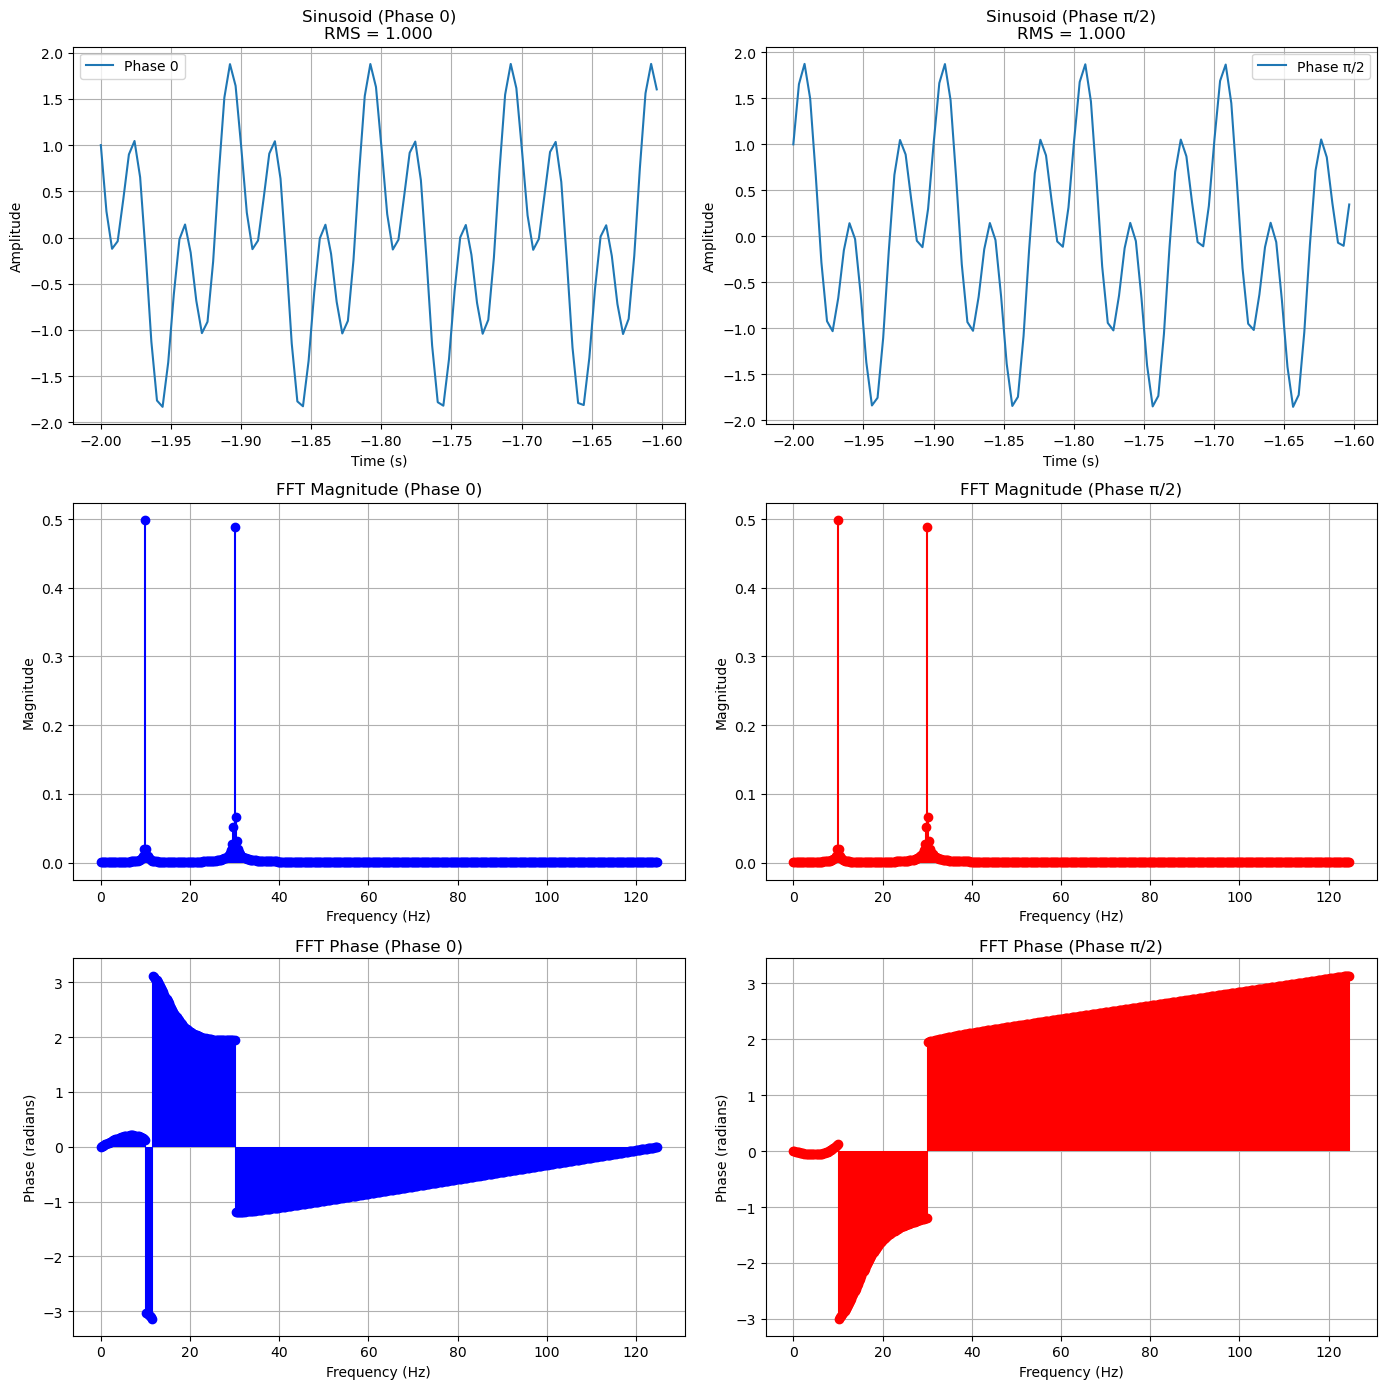

Notice that the FFT magnitude spectra of the two signals are identical,
even though the time-domain signals are different due to their phase.
This shows that the FFT magnitude does not retain phase information.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sinusoidal signal
def sinusoidal(t, A=1, omega=2*np.pi, phi=0):
    return A * np.cos(omega * t + phi)

# RMS calculation function
def rms(x):
    return np.sqrt(np.mean(np.square(x)))

# Time vector
t = np.linspace(-2, 2, 1000)
# Two signals with same frequency and amplitude, but different phases
y1 = sinusoidal(t, A=1, omega=2*np.pi*10, phi=0)
y2 = sinusoidal(t, A=1, omega=2*np.pi*30, phi=np.pi/2)
y3 = sinusoidal(t, A=1, omega=2*np.pi*30, phi=-np.pi/2)

x1 = y1 + y2
x2 = y1 + y3

# Compute FFTs
X1 = np.fft.fft(x1)
X2 = np.fft.fft(x2)
freqs = np.fft.fftfreq(len(t), d=(t[1]-t[0]))

# Only plot the positive frequencies
idx = np.argsort(freqs)
freqs_sorted = freqs[idx]
X1_sorted = X1[idx]
X2_sorted = X2[idx]
pos_mask = freqs_sorted >= 0

# Create a 3-row, 2-column grid: 
# (1,1) and (1,2): time domain (merged)
# (2,1): FFT magnitude of x1, (2,2): FFT magnitude of x2
# (3,1): FFT phase of x1, (3,2): FFT phase of x2

fig, axes = plt.subplots(3, 2, figsize=(14, 14))

slice = 100

# Calculate RMS values for the time domain signals (over the full signal)
rms_x1 = rms(x1)
rms_x2 = rms(x2)

# First row: time domain, left: x1, right: x2
axes[0,0].plot(t[:slice], x1[:slice], label='Phase 0')
axes[0,0].set_title(f'Sinusoid (Phase 0)\nRMS = {rms_x1:.3f}')
axes[0,0].set_xlabel('Time (s)')
axes[0,0].set_ylabel('Amplitude')
axes[0,0].legend()
axes[0,0].grid(True)

axes[0,1].plot(t[:slice], x2[:slice], label='Phase π/2')
axes[0,1].set_title(f'Sinusoid (Phase π/2)\nRMS = {rms_x2:.3f}')
axes[0,1].set_xlabel('Time (s)')
axes[0,1].set_ylabel('Amplitude')
axes[0,1].legend()
axes[0,1].grid(True)

# Second row: FFT Magnitude, left for x1, right for x2
axes[1,0].stem(freqs_sorted[pos_mask], np.abs(X1_sorted[pos_mask])/len(t), 
               linefmt='b-', markerfmt='bo', basefmt=' ')
axes[1,0].set_title('FFT Magnitude (Phase 0)')
axes[1,0].set_xlabel('Frequency (Hz)')
axes[1,0].set_ylabel('Magnitude')
axes[1,0].grid(True)

axes[1,1].stem(freqs_sorted[pos_mask], np.abs(X2_sorted[pos_mask])/len(t), 
               linefmt='r-', markerfmt='ro', basefmt=' ')
axes[1,1].set_title('FFT Magnitude (Phase π/2)')
axes[1,1].set_xlabel('Frequency (Hz)')
axes[1,1].set_ylabel('Magnitude')
axes[1,1].grid(True)

# Third row: FFT Phase, left for x1, right for x2
axes[2,0].stem(freqs_sorted[pos_mask], np.angle(X1_sorted[pos_mask]), 
               linefmt='b-', markerfmt='bo', basefmt=' ')
axes[2,0].set_title('FFT Phase (Phase 0)')
axes[2,0].set_xlabel('Frequency (Hz)')
axes[2,0].set_ylabel('Phase (radians)')
axes[2,0].grid(True)

axes[2,1].stem(freqs_sorted[pos_mask], np.angle(X2_sorted[pos_mask]), 
               linefmt='r-', markerfmt='ro', basefmt=' ')
axes[2,1].set_title('FFT Phase (Phase π/2)')
axes[2,1].set_xlabel('Frequency (Hz)')
axes[2,1].set_ylabel('Phase (radians)')
axes[2,1].grid(True)

plt.tight_layout()
plt.show()

# Demonstration:
print("Notice that the FFT magnitude spectra of the two signals are identical,")
print("even though the time-domain signals are different due to their phase.")
print("This shows that the FFT magnitude does not retain phase information.")

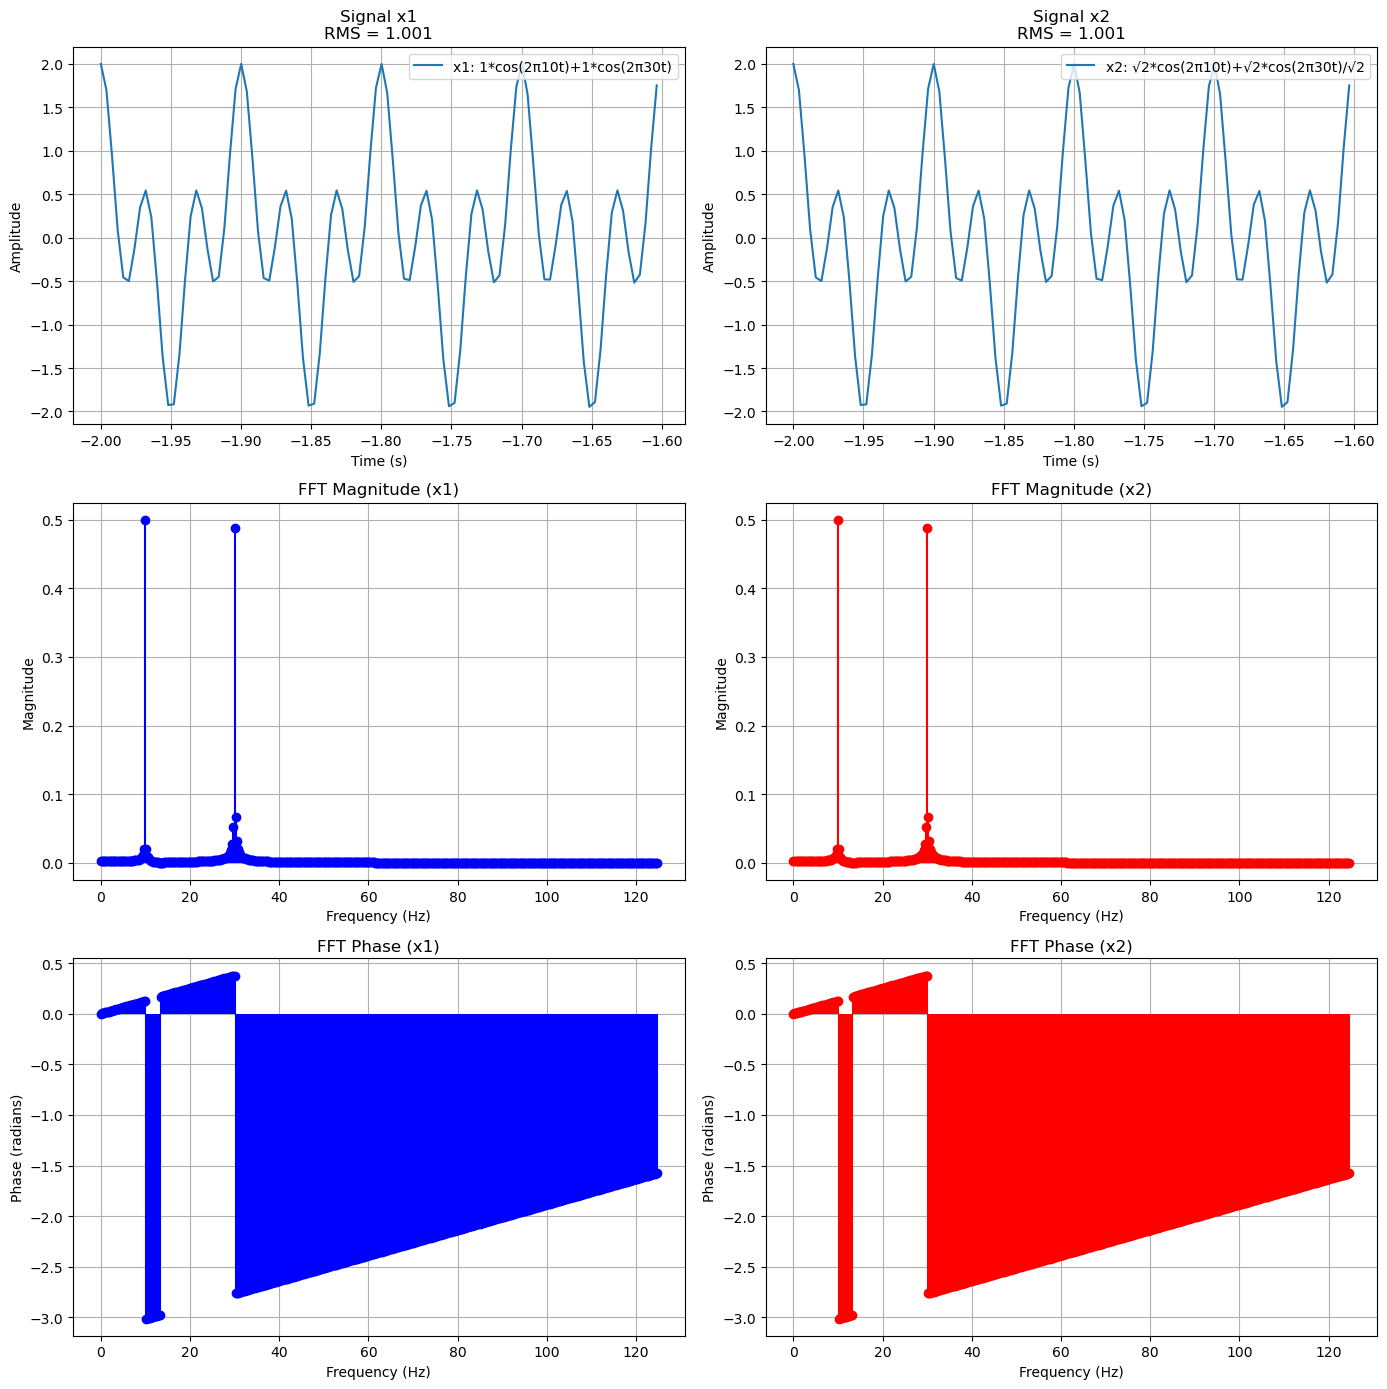

Notice that the FFT magnitude spectra of the two signals are very similar,
even though the time-domain signals have different RMS values.
This shows that signals with similar frequency content (FFT) can have different energy (RMS).


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Sinusoidal signal
def sinusoidal(t, A=1, omega=2*np.pi, phi=0):
    return A * np.cos(omega * t + phi)

# RMS calculation function
def rms(x):
    return np.sqrt(np.mean(np.square(x)))

# Time vector
t = np.linspace(-2, 2, 1000)

# Scenario: Two signals, each a sum of two sinusoids with the same frequencies,
# but with different amplitude combinations, so that their FFT magnitudes are similar
# (same peaks at the same frequencies), but their RMS values are different.

# Frequencies
f1 = 10  # Hz
f2 = 30  # Hz

# Signal 1: both sinusoids with amplitude 1
y1 = sinusoidal(t, A=1, omega=2*np.pi*f1, phi=0)
y2 = sinusoidal(t, A=1, omega=2*np.pi*f2, phi=0)
x1 = y1 + y2

# Signal 2: both sinusoids with amplitude sqrt(2), but divided by sqrt(2) to keep the FFT peaks at the same height
# (since FFT magnitude is proportional to amplitude, but RMS is sensitive to the sum of squares)
y1b = sinusoidal(t, A=np.sqrt(2), omega=2*np.pi*f1, phi=0)
y2b = sinusoidal(t, A=np.sqrt(2), omega=2*np.pi*f2, phi=0)
x2 = (y1b + y2b) / np.sqrt(2)

# Compute FFTs
X1 = np.fft.fft(x1)
X2 = np.fft.fft(x2)
freqs = np.fft.fftfreq(len(t), d=(t[1]-t[0]))

# Only plot the positive frequencies
idx = np.argsort(freqs)
freqs_sorted = freqs[idx]
X1_sorted = X1[idx]
X2_sorted = X2[idx]
pos_mask = freqs_sorted >= 0

# Create a 3-row, 2-column grid: 
# (1,1) and (1,2): time domain (merged)
# (2,1): FFT magnitude of x1, (2,2): FFT magnitude of x2
# (3,1): FFT phase of x1, (3,2): FFT phase of x2

fig, axes = plt.subplots(3, 2, figsize=(14, 14))

slice = 100

# Calculate RMS values for the time domain signals (over the full signal)
rms_x1 = rms(x1)
rms_x2 = rms(x2)

# First row: time domain, left: x1, right: x2
axes[0,0].plot(t[:slice], x1[:slice], label=f'x1: 1*cos(2π{f1}t)+1*cos(2π{f2}t)')
axes[0,0].set_title(f'Signal x1\nRMS = {rms_x1:.3f}')
axes[0,0].set_xlabel('Time (s)')
axes[0,0].set_ylabel('Amplitude')
axes[0,0].legend()
axes[0,0].grid(True)

axes[0,1].plot(t[:slice], x2[:slice], label=f'x2: √2*cos(2π{f1}t)+√2*cos(2π{f2}t)/√2')
axes[0,1].set_title(f'Signal x2\nRMS = {rms_x2:.3f}')
axes[0,1].set_xlabel('Time (s)')
axes[0,1].set_ylabel('Amplitude')
axes[0,1].legend()
axes[0,1].grid(True)

# Second row: FFT Magnitude, left for x1, right for x2
axes[1,0].stem(freqs_sorted[pos_mask], np.abs(X1_sorted[pos_mask])/len(t), 
               linefmt='b-', markerfmt='bo', basefmt=' ')
axes[1,0].set_title('FFT Magnitude (x1)')
axes[1,0].set_xlabel('Frequency (Hz)')
axes[1,0].set_ylabel('Magnitude')
axes[1,0].grid(True)

axes[1,1].stem(freqs_sorted[pos_mask], np.abs(X2_sorted[pos_mask])/len(t), 
               linefmt='r-', markerfmt='ro', basefmt=' ')
axes[1,1].set_title('FFT Magnitude (x2)')
axes[1,1].set_xlabel('Frequency (Hz)')
axes[1,1].set_ylabel('Magnitude')
axes[1,1].grid(True)

# Third row: FFT Phase, left for x1, right for x2
axes[2,0].stem(freqs_sorted[pos_mask], np.angle(X1_sorted[pos_mask]), 
               linefmt='b-', markerfmt='bo', basefmt=' ')
axes[2,0].set_title('FFT Phase (x1)')
axes[2,0].set_xlabel('Frequency (Hz)')
axes[2,0].set_ylabel('Phase (radians)')
axes[2,0].grid(True)

axes[2,1].stem(freqs_sorted[pos_mask], np.angle(X2_sorted[pos_mask]), 
               linefmt='r-', markerfmt='ro', basefmt=' ')
axes[2,1].set_title('FFT Phase (x2)')
axes[2,1].set_xlabel('Frequency (Hz)')
axes[2,1].set_ylabel('Phase (radians)')
axes[2,1].grid(True)

plt.tight_layout()
plt.show()

# Demonstration:
print("Notice that the FFT magnitude spectra of the two signals are very similar,")
print("even though the time-domain signals have different RMS values.")
print("This shows that signals with similar frequency content (FFT) can have different energy (RMS).")

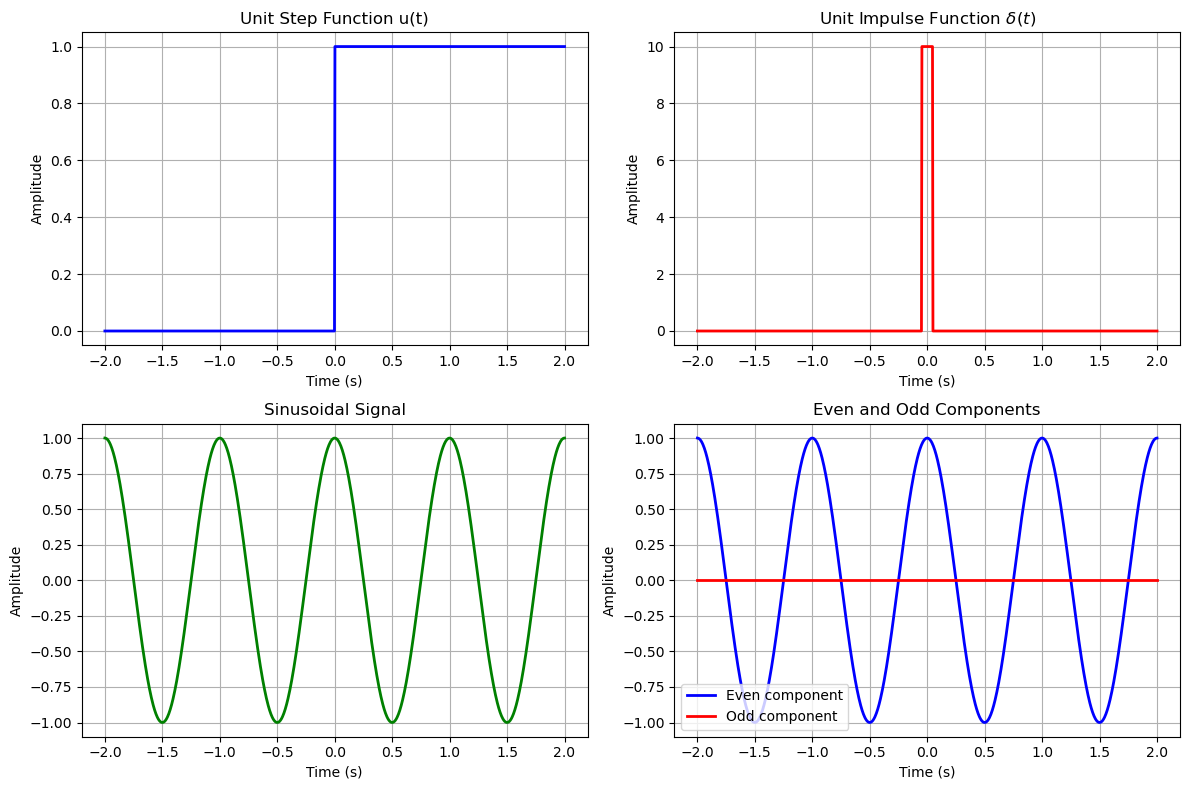

In [5]:
# Unit step function
def unit_step(t):
    return np.where(t >= 0, 1, 0)

# Unit impulse approximation
def unit_impulse(t, width=0.1):
    return np.where(np.abs(t) <= width/2, 1/width, 0)

# Plot the signals
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Unit step
axes[0,0].plot(t, unit_step(t), 'b-', linewidth=2)
axes[0,0].set_title('Unit Step Function u(t)')
axes[0,0].grid(True)
axes[0,0].set_xlabel('Time (s)')
axes[0,0].set_ylabel('Amplitude')

# Unit impulse
axes[0,1].plot(t, unit_impulse(t), 'r-', linewidth=2)
axes[0,1].set_title('Unit Impulse Function $\\delta(t)$')
axes[0,1].grid(True)
axes[0,1].set_xlabel('Time (s)')
axes[0,1].set_ylabel('Amplitude')

# Sinusoidal signal
axes[1,0].plot(t, sinusoidal(t), 'g-', linewidth=2)
axes[1,0].set_title('Sinusoidal Signal')
axes[1,0].grid(True)
axes[1,0].set_xlabel('Time (s)')
axes[1,0].set_ylabel('Amplitude')

# Even and odd components
x_even = 0.5 * (sinusoidal(t) + sinusoidal(-t))
x_odd = 0.5 * (sinusoidal(t) - sinusoidal(-t))

axes[1,1].plot(t, x_even, 'b-', label='Even component', linewidth=2)
axes[1,1].plot(t, x_odd, 'r-', label='Odd component', linewidth=2)
axes[1,1].set_title('Even and Odd Components')
axes[1,1].legend()
axes[1,1].grid(True)
axes[1,1].set_xlabel('Time (s)')
axes[1,1].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

## Energy and Power

For a signal $x(t)$, we define:

**Energy**:
$$E = \int_{-\infty}^{\infty} |x(t)|^2 \, dt$$

**Power** (for periodic signals):
$$P = \frac{1}{T} \int_0^T |x(t)|^2 \, dt$$

A signal is called:
- **Energy signal** if $E < \infty$ and $P = 0$
- **Power signal** if $P < \infty$ and $E = \infty$